In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!wget --no-check-certificate https://drive.google.com/uc?id=1Vy0OPYInhYxuZzSn415DsguHWVH7ROe0 -O two_way_anova.csv


--2025-07-16 06:24:27--  https://drive.google.com/uc?id=1Vy0OPYInhYxuZzSn415DsguHWVH7ROe0
Resolving drive.google.com (drive.google.com)... 142.251.221.206, 2404:6800:4007:831::200e
Connecting to drive.google.com (drive.google.com)|142.251.221.206|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1Vy0OPYInhYxuZzSn415DsguHWVH7ROe0 [following]
--2025-07-16 06:24:28--  https://drive.usercontent.google.com/download?id=1Vy0OPYInhYxuZzSn415DsguHWVH7ROe0
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.192.129, 2404:6800:4007:835::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.192.129|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1541 (1.5K) [application/octet-stream]
Saving to: ‘two_way_anova.csv’

two_way_anova.csv   100%[===================>]   1.50K  --.-KB/s    in 0s      

2025-07-16 06:24:29 (107 MB/s) - ‘tw

In [3]:
df=pd.read_csv('two_way_anova.csv')
df.head()

,Flavour,Location,Sales
0,Orange,West,141
1,Lemon,West,178
2,Orange,West,170
3,Orange,East,76
4,Lemon,East,170


In [4]:
df['Flavour'].unique()

array(['Orange', 'Lemon', 'Cola'], dtype=object)

In [5]:
df['Location'].unique()

array(['West', 'East', 'North', 'South'], dtype=object)

In [6]:
!pip install pingouin


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [7]:
import pingouin as pg

In [8]:
dv = "Sales"
ipdv = ['Location', 'Flavour']
model = pg.anova(dv=dv,between=ipdv,data=df)

print(round(model,4))

               Source           SS    DF         MS       F   p-unc     np2
0            Location    2059.2739   3.0   686.4246  0.3905  0.7601  0.0131
1             Flavour    6919.5590   2.0  3459.7795  1.9685  0.1458  0.0428
2  Location * Flavour   11802.2578   6.0  1967.0430  1.1192  0.3578  0.0709
3            Residual  154669.0163  88.0  1757.6025     NaN     NaN     NaN


### **KS Test**

In [9]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# recovery times of patients who took medicine-1
r1 = [8.82420842, 7.47774471, 7.55712098, 7.98131439, 6.82771606,
       7.48566433, 9.15385732, 5.84040502, 8.26124313, 8.4728876 ,
       6.82582186, 7.00490974, 8.43423058, 6.72099932, 6.97495982,
       5.93748053, 5.40707847, 6.16385557, 6.71421056, 4.42396183,
       6.87285228, 8.00313581, 6.69035041, 7.83622942, 8.70984957,
       5.56284584, 9.08093437, 4.98165193, 7.67769408, 6.04738478,
       7.64921582, 7.31051639, 6.74463303, 7.27356973, 8.16787232,
       6.90990965, 7.06439167, 6.62921957, 6.08283539, 6.2458137 ,
       8.65173634, 5.76080646, 6.20573219, 8.91561004, 6.22560201,
       5.67542104, 6.97412435, 8.31354697, 8.14172701, 8.26099345,
       7.87612791, 6.24835109, 9.95324783, 6.59504627, 6.17365145,
       6.05676895, 7.23030223, 7.71311809, 7.37163804, 5.69798738,
       5.71056902, 7.94556876, 7.47234105, 6.85346234, 4.77892053,
       6.92631063, 6.10681151, 7.06277198, 7.18023164, 7.78285327,
       7.85500885, 6.54349161, 8.25949958, 6.44289198, 7.16705977,
       6.03517015, 7.61274786, 7.032845  , 6.78161745, 7.07917968,
       6.21549342, 5.34267439, 6.73039933, 7.70562561, 8.15117049,
       6.72564324, 6.68220904, 8.50359274, 7.52912703, 7.34572493,
       5.95734283, 6.58259396, 6.49394335, 8.68069592, 8.60547125,
       6.8905056 , 7.72575925, 6.84801609, 7.96999724, 7.10420915]

In [11]:
# recovery times of patietnts who took medicine-2
r2 = [ 9.56597358,  7.49291458,  8.73841824,  7.63523452,  4.12559277,
        7.3679259 ,  9.87873565,  6.14516559,  8.19923821,  7.30169992,
       10.24606417,  6.83814477,  7.01611267,  6.15716049,  8.29590714,
       12.3333305 ,  8.22144016,  6.06830071,  3.75820649,  6.69220157,
       10.08721618,  9.70580422,  7.31050006, 11.40145721,  5.64818498,
        7.38914449,  8.43740074,  6.3451435 ,  7.05694361,  8.1997151 ,
        9.03059061,  7.76904679,  6.92375578,  5.78318543,  8.99027781,
        7.56186529,  5.27095372,  8.32896688, 11.52935757,  7.08119961,
        9.48825066,  9.14072759,  7.30357663,  8.62183754, 10.40999814,
        8.70096763,  7.04645384,  6.378799  , 10.5098363 ,  7.36078888,
        7.33403615,  8.07396248,  6.18309499,  7.24668404,  9.03430611,
        8.99016584,  6.78606416,  8.436418  ,  6.85877947, 10.10405772,
        6.74943076,  7.57812376,  7.12920671,  9.38065269,  9.57139966,
        6.4484012 ,  6.93877043,  9.22141667,  8.34815638,  7.73980671,
        7.17840767,  9.27913457,  6.49963224,  9.92287292,  7.63978639,
        9.53931977,  9.02602273,  6.79374185,  8.59715131,  8.37747338,
        8.78161815,  6.78716383,  8.28473394,  8.20283798, 12.50518811,
       10.19772574,  8.93758457,  8.9540311 ,  8.28927558,  6.28935098,
        7.69447559,  9.66777701, 10.33898342,  8.71199578,  5.12781581,
        9.70954569,  9.13685031,  7.28989718,  8.0868909 ,  7.42937556,
        7.31356749,  9.92345816,  8.60211814,  9.33228465,  8.14132658,
        6.17871495, 10.28358242,  7.31898597,  7.95085527,  6.20331719,
        9.19119762,  6.98600628,  7.05314883, 10.57921482,  6.83637574,
        7.86199283,  8.23350975,  5.87625665,  7.78945364,  8.83612492]

In [12]:
d1 = np.array(r1)
d2 = np.array(r2)
n1 = len(d1)
n2 = len(d2)
n1, n2

(100, 120)

In [13]:
stats.kstest(d1, d2)

KstestResult(statistic=0.3233333333333333, pvalue=1.516338798228849e-05, statistic_location=8.16787232, statistic_sign=1)

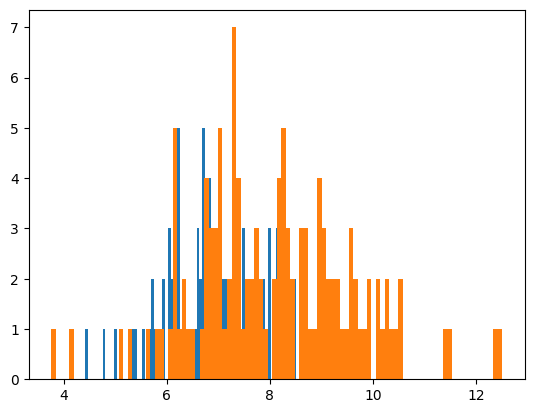

In [14]:
plt.hist(d1,bins=100)
plt.hist(d2,bins=100)

plt.show()

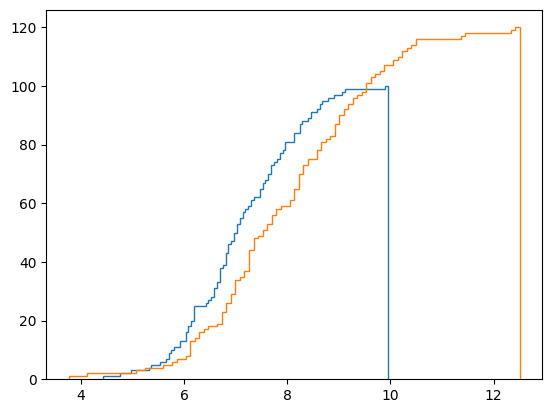

In [15]:
plt.hist(d1,bins=100,cumulative=True,histtype='step')
plt.hist(d2,bins=100,cumulative=True,histtype='step')

plt.show()

In [16]:
data1 = [ 4.96714153,  1.38264301,  6.47688538, 15.23029856,  2.34153375,
        2.34136957, 15.79212816,  7.67434729,  4.69474386,  5.42560044,
        4.63417693,  4.65729754,  2.41962272, 19.13280245, 17.24917833,
        5.62287529, 10.1283112 ,  3.14247333,  9.08024076, 14.12303701,
       14.65648769,  2.257763  ,  0.67528205, 14.24748186,  5.44382725,
        1.1092259 , 11.50993577,  3.75698018,  6.0063869 ,  2.9169375 ,
        6.01706612, 18.52278185,  0.13497225, 10.57710929,  8.22544912,
       12.2084365 ,  2.08863595, 19.59670124, 13.28186049,  1.96861236,
        7.3846658 ,  1.71368281,  1.15648282,  3.01103696, 14.7852199 ,
        7.19844208,  4.60638771, 10.57122226,  3.4361829 , 17.63040155,
        3.24083969,  3.8508228 ,  6.76922   ,  6.11676289, 10.30999522,
        9.31280119,  8.39217523,  3.09212376,  3.31263431,  9.75545127,
        4.79174238,  1.85658977, 11.06334974, 11.96206624,  8.12525822,
       13.56240029,  0.72010122, 10.03532898,  3.61636025,  6.45119755,
        3.61395606, 15.38036566,  0.35826039, 15.64643656, 26.19745104,
        8.21902504,  0.87047068,  2.9900735 ,  0.91760777, 19.87568915,
        2.19671888,  3.57112572, 14.77894045,  5.18270218,  8.08493603,
        5.01757044,  9.15402118,  3.2875111 ,  5.29760204,  5.13267433,
        0.97077549,  9.68644991,  7.02053094,  3.27662147,  3.92108153,
       14.63514948,  2.96120277,  2.61055272,  0.05113457,  2.34587133]

In [17]:
data2 = [14.15370742,  4.20645323,  3.42714517,  8.02277269,  1.61285712,
        4.04050857, 18.86185901,  1.74577813,  2.57550391,  0.74445916,
       19.18771215,  0.26513875,  0.6023021 , 24.63242112,  1.92360965,
        3.01547342,  0.3471177 , 11.68678038, 11.42822815,  7.51933033,
        7.91031947,  9.09387455, 14.02794311, 14.01851063,  5.86857094,
       21.90455626,  9.90536325,  5.6629773 ,  0.99651365,  5.03475654,
       15.50663431,  0.68562975, 10.62303714,  4.73592431,  9.19424234,
       15.49934405,  7.83253292,  3.22061516,  8.13517217, 12.30864316,
        2.27459935, 13.07142754, 16.07483235,  1.84633859,  2.59882794,
        7.81822872, 12.36950711, 13.20456613,  5.21941566,  2.96984673,
        2.5049285 ,  3.46448209,  6.80024722,  2.32253697,  2.93072473,
        7.14351418, 18.65774511,  4.73832921, 11.91303497,  6.56553609,
        9.7468167 ,  7.87084604, 11.58595579,  8.20682318,  9.63376129,
        4.12780927,  8.2206016 , 18.96792983,  2.45388116,  7.53736164,
        8.8951443 ,  8.15810285,  0.77101709,  3.41151975,  2.76690799,
        8.27183249,  0.13001892, 14.53534077,  2.64656833, 27.20169167,
        6.25667348,  8.57157556, 10.70892498,  4.82472415,  2.23462785,
        7.14000494,  4.73237625,  0.72828913,  8.46793718, 15.14847225,
        4.46514952,  8.56398794,  2.14093744, 12.45738779,  1.73180926,
        3.8531738 ,  8.83857436,  1.53725106,  0.58208718, 11.42970298,
        3.5778736 ,  5.60784526, 10.83051243, 10.53802052, 13.77669368,
        9.3782504 ,  5.15035267,  5.13785951,  5.15047686, 38.52731491,
        5.70890511, 11.3556564 ,  9.54001763,  6.51391251,  3.15269245,
        7.5896922 ,  7.72825215,  2.36818607,  4.85363548,  0.81874139]

In [18]:
data1 = np.array(data1)
data2 = np.array(data2)
n1 = len(data1)
n2 = len(data2)
n1, n2

(100, 120)

In [19]:
statistic, p_value =  stats.kstest(data1, data2)
print("KS Statistic:", statistic)
print("P-value:", p_value)

KS Statistic: 0.095
P-value: 0.671374753605883


In [20]:
# Check if the p-value is greater than 0.01
if p_value > 0.01:
    print("The p-value is greater than 0.01,two samples have the same distribution.")
else:
    print("The p-value is less than or equal to 0.01, two samples have different distributions.")

The p-value is greater than 0.01,two samples have the same distribution.


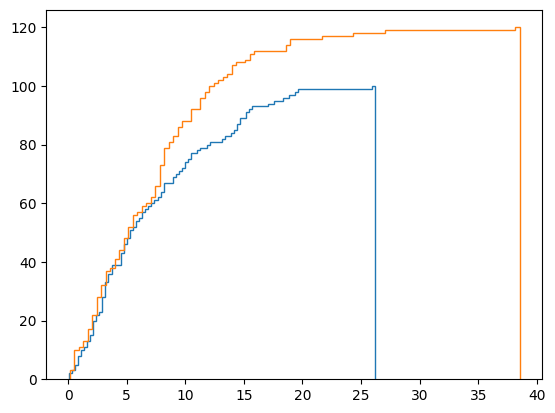

In [21]:
plt.hist(data1,bins=100,cumulative=True,histtype='step')
plt.hist(data2,bins=100,cumulative=True,histtype='step')

plt.show()

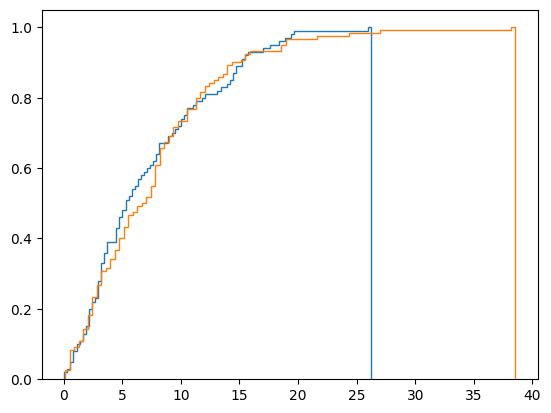

In [22]:
plt.hist(data1,bins=100,cumulative=True,histtype='step',density=True)
plt.hist(data2,bins=100,cumulative=True,histtype='step',density=True)

plt.show()

### **Correlation**

In [23]:
df_hw =pd.read_csv("weight-height.csv")
df_hw

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


<Axes: xlabel='Height', ylabel='Weight'>

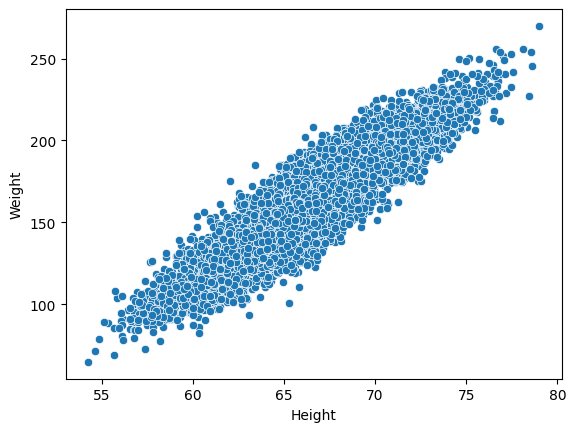

In [24]:
sns.scatterplot(x=df_hw['Height'],y=df_hw['Weight'])

In [25]:
df_hw[["Height","Weight"]].corr()

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


In [ ]:
x = [1, 2, 3, 4, 5]
y = [5, 4, 3, 2, 1]


<Axes: >

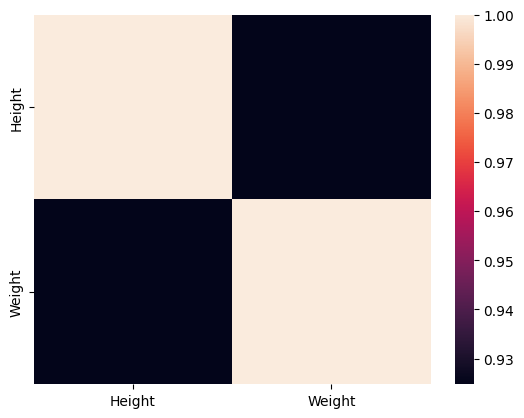

In [26]:
sns.heatmap(df_hw[["Height", "Weight"]].corr())

In [28]:
from scipy.stats import pearsonr, spearmanr

In [29]:
spearmanr(df_hw["Height"], df_hw["Weight"])

SignificanceResult(statistic=0.9257076644210767, pvalue=0.0)

In [30]:
x = [1, 2, 3, 4, 5, 6, 7]
y = [10, 9, 2.5, 6, 4, 3, 2]
pearsonr(x,y)

PearsonRResult(statistic=-0.8285038835884277, pvalue=0.021280260007523342)

In [31]:
data = [(1.0, 4), (4.0, 5), (6.0, 7), (9.0, 9), (11.0, 12), (12.0, 15),
        (13.0, 17), (14.0, 18), (15.0, 28), (15.5, 32)]

In [32]:
df = pd.DataFrame(data)
df.columns = ["x", "y"]

In [33]:
df

,x,y
0,1.0,4
1,4.0,5
2,6.0,7
3,9.0,9
4,11.0,12
5,12.0,15
6,13.0,17
7,14.0,18
8,15.0,28
9,15.5,32


In [34]:
df.x.mean(), df.y.mean()

(10.05, 14.7)

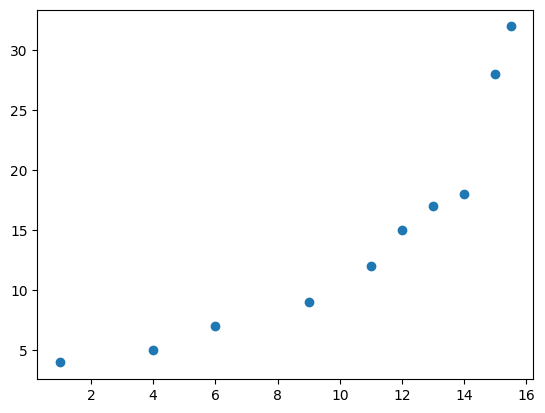

In [36]:
plt.scatter(df.x,df.y)

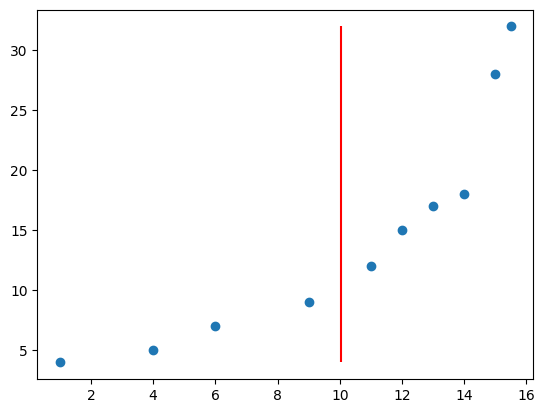

In [39]:
plt.vlines(df.x.mean(), df.y.min(), df.y.max(), color = 'r')
plt.scatter(df.x, df.y)

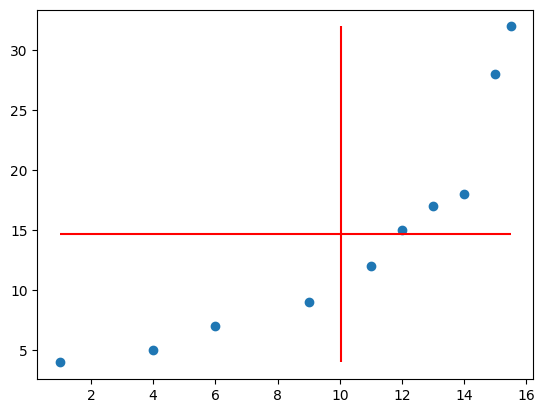

In [40]:
plt.vlines(df.x.mean(), df.y.min(), df.y.max(), color = 'r')
plt.hlines(df.y.mean(), df.x.min(), df.x.max(), color = 'r')
plt.scatter(df.x, df.y)

In [41]:
df.columns = ["years","salary"]

In [42]:
df["rank_years"] = pd.Series.rank(df.years)
df

,years,salary,rank_years
0,1.0,4,1.0
1,4.0,5,2.0
2,6.0,7,3.0
3,9.0,9,4.0
4,11.0,12,5.0
5,12.0,15,6.0
6,13.0,17,7.0
7,14.0,18,8.0
8,15.0,28,9.0
9,15.5,32,10.0


In [43]:
df["rank_salary"] = pd.Series.rank(df.salary)
df

,years,salary,rank_years,rank_salary
0,1.0,4,1.0,1.0
1,4.0,5,2.0,2.0
2,6.0,7,3.0,3.0
3,9.0,9,4.0,4.0
4,11.0,12,5.0,5.0
5,12.0,15,6.0,6.0
6,13.0,17,7.0,7.0
7,14.0,18,8.0,8.0
8,15.0,28,9.0,9.0
9,15.5,32,10.0,10.0


In [44]:
spearmanr(df.years, df.salary)

SignificanceResult(statistic=0.9999999999999999, pvalue=6.646897422032013e-64)

In [45]:
pearsonr(df.years, df.salary)

PearsonRResult(statistic=0.8850072528845457, pvalue=0.0006644090744254629)

In [46]:
!wget --no-check-certificate https://drive.google.com/uc?id=1s2Qad59GSQPT733fbS5fnULPhilRGj25 -O concrete_data.csv

--2025-07-16 06:47:41--  https://drive.google.com/uc?id=1s2Qad59GSQPT733fbS5fnULPhilRGj25
Resolving drive.google.com (drive.google.com)... 142.251.221.206, 2404:6800:4009:805::200e
Connecting to drive.google.com (drive.google.com)|142.251.221.206|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1s2Qad59GSQPT733fbS5fnULPhilRGj25 [following]
--2025-07-16 06:47:42--  https://drive.usercontent.google.com/download?id=1s2Qad59GSQPT733fbS5fnULPhilRGj25
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.43.129, 2404:6800:4007:81b::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.43.129|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59010 (58K) [application/octet-stream]
Saving to: ‘concrete_data.csv’

concrete_data.csv   100%[===================>]  57.63K  --.-KB/s    in 0.07s   

2025-07-16 06:47:44 (871 KB/s) - ‘conc

In [47]:
df = pd.read_csv('concrete_data.csv')
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


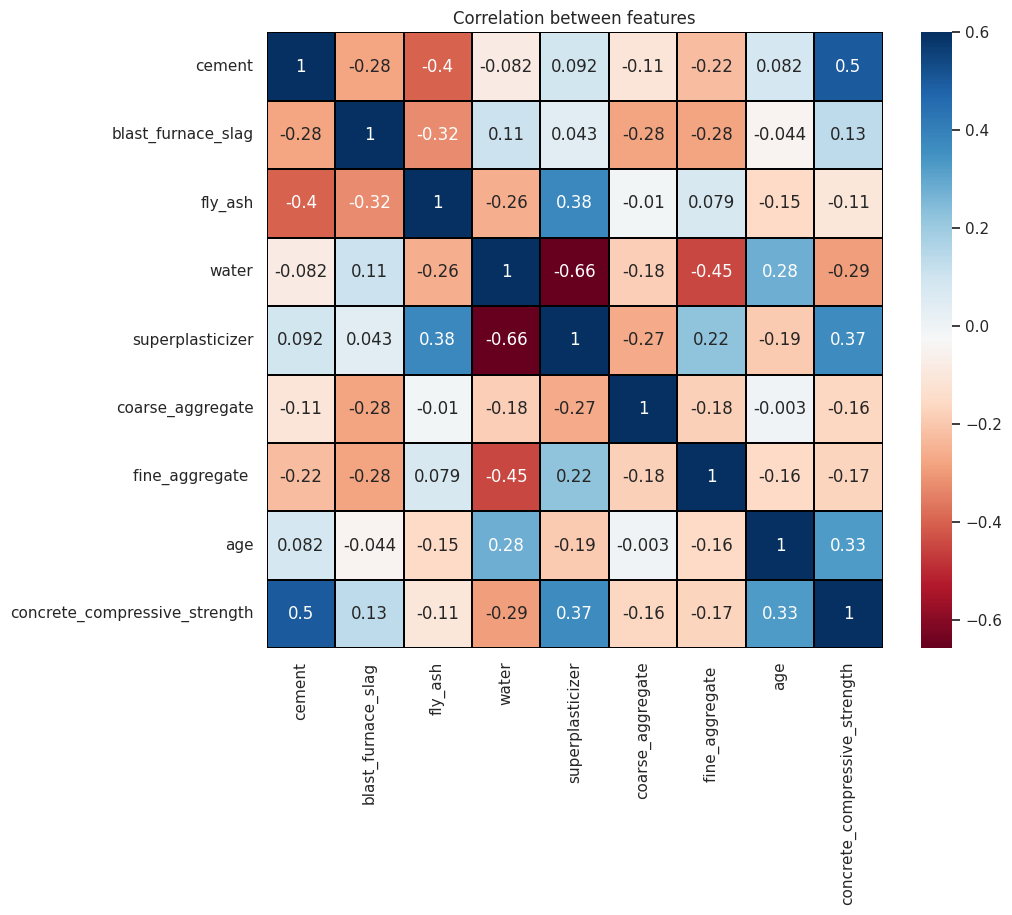

In [48]:

sns.set(font_scale=1.0)
plt.figure(figsize=(10,8))
correlation_values = df.corr(method = 'pearson')
sns.heatmap(correlation_values, vmax = .6, linewidths=0.01, square=True, annot=True, cmap="RdBu", linecolor="black")
plt.title('Correlation between features');